Number of scam samples: 100659
Number of non-scam samples: 100659
Total number of samples in the balanced dataset: 201318
Training data: Scam = 50.00%, Non-Scam = 50.00%
Testing data: Scam = 50.00%, Non-Scam = 50.00%
Training model on Text_Encoded_Word column
Epoch 1/4
2517/2517 [==============================] - 8086s 3s/step - loss: 0.7607 - accuracy: 0.9177 - val_loss: 0.1851 - val_accuracy: 0.9548
Epoch 2/4
2517/2517 [==============================] - 8134s 3s/step - loss: 0.1217 - accuracy: 0.9743 - val_loss: 0.1913 - val_accuracy: 0.9453
Epoch 3/4
2517/2517 [==============================] - 7966s 3s/step - loss: 0.0763 - accuracy: 0.9855 - val_loss: 0.1625 - val_accuracy: 0.9540
Epoch 4/4
1259/1259 [==============================] - 4s 3ms/step - loss: 0.1648 - accuracy: 0.9517
Test accuracy on Text_Encoded_Word column: 0.9517186284065247
1259/1259 [==============================] - 4s 3ms/step
Confusion matrix on Text_Encoded_Word column:
 [[18739  1393]
 [  551 19581]]

Confus

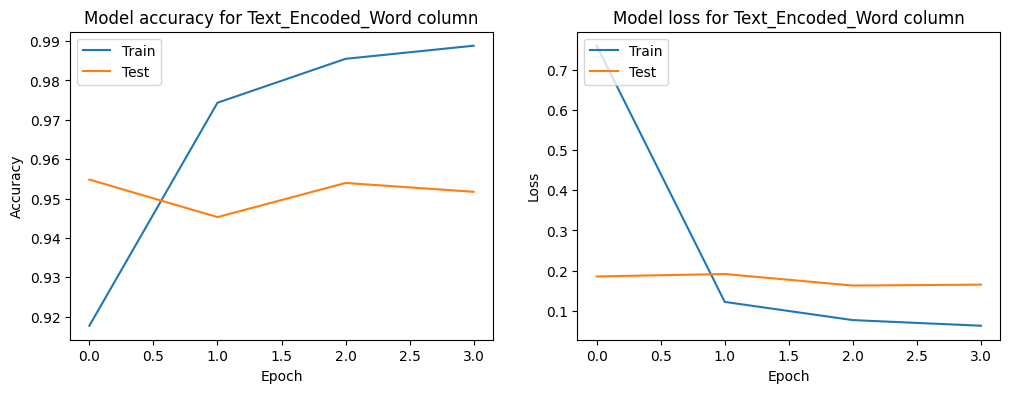

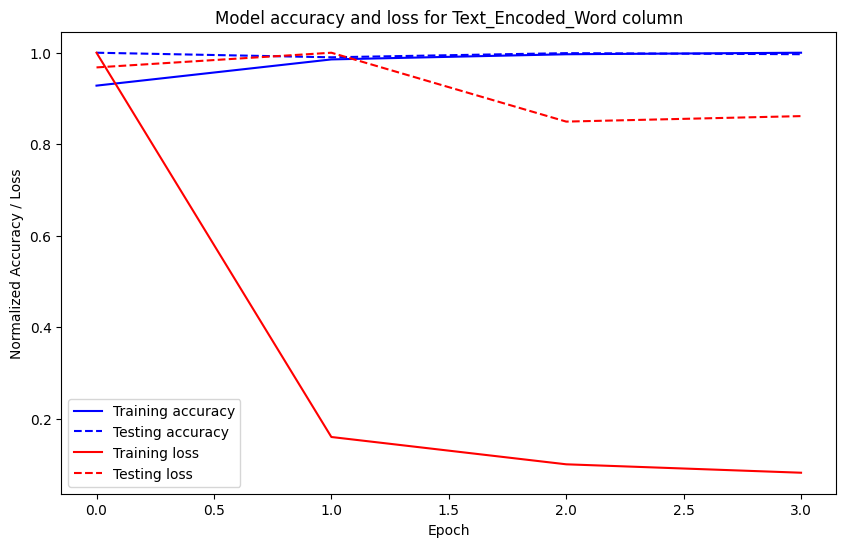

Training model on Text_Encoded_Character column
Epoch 1/10
2517/2517 [==============================] - 11283s 4s/step - loss: 1.2192 - accuracy: 0.6986 - val_loss: 1.2128 - val_accuracy: 0.5330
Epoch 2/10
2517/2517 [==============================] - 8766s 3s/step - loss: 0.6515 - accuracy: 0.7184 - val_loss: 0.8000 - val_accuracy: 0.6327
Epoch 3/10
2517/2517 [==============================] - 8839s 4s/step - loss: 0.6187 - accuracy: 0.7224 - val_loss: 2.0039 - val_accuracy: 0.5040
Epoch 4/10
2517/2517 [==============================] - 8069s 3s/step - loss: 0.6062 - accuracy: 0.7248 - val_loss: 1.6676 - val_accuracy: 0.5064
Epoch 5/10
2517/2517 [==============================] - 8094s 3s/step - loss: 0.5990 - accuracy: 0.7282 - val_loss: 0.6300 - val_accuracy: 0.7107
Epoch 6/10
2517/2517 [==============================] - 8242s 3s/step - loss: 0.5908 - accuracy: 0.7309 - val_loss: 0.6129 - val_accuracy: 0.7199
Epoch 7/10
2517/2517 [==============================] - 8048s 3s/step - los

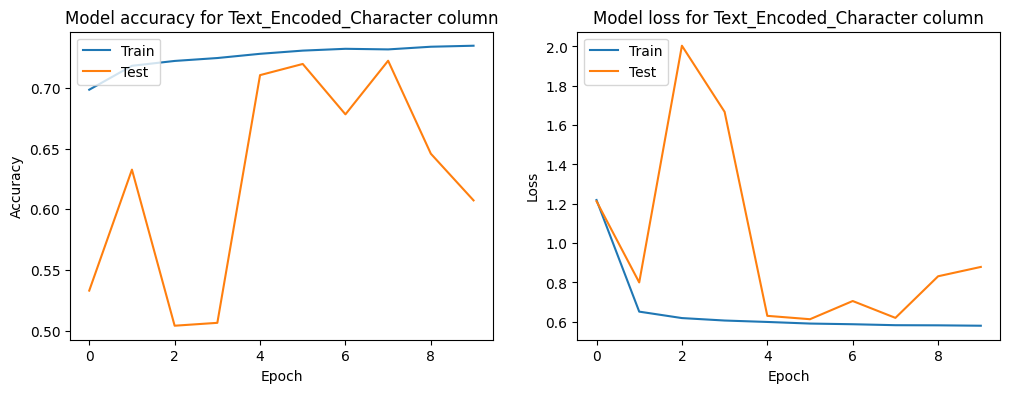

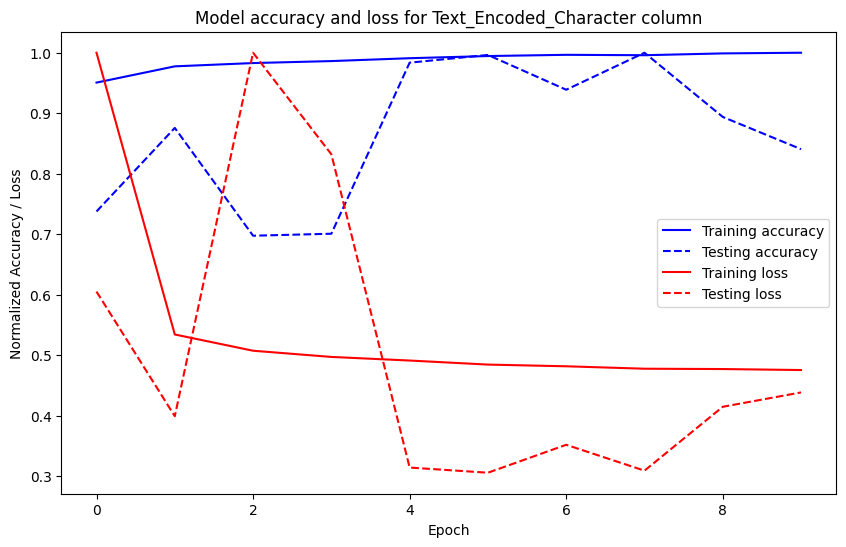

In [1]:



import tensorflow as tf
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)
import numpy as np
import random
import tensorflow as tf

# Set the seed for random number generation
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)





###balanced input 50%-50% and improved model ++++


import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'



# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')
# Find the maximum index value from both columns
#max_word_index = max(data['Text_Encoded_Word'].apply(max).max(), data['Text_Encoded_Character'].apply(max).max())
#print(max_word_index)

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')

# Split the dataset into scam and non-scam dataframes
scam_data = data[data['Scam'] == 1]
non_scam_data = data[data['Scam'] == 0]

# Find the minimum number of samples between scam and non-scam dataframes
min_samples = min(len(scam_data), len(non_scam_data))

# Calculate the number of samples for each class to make 10% of the main dataset
sample_size = int(1 * len(data) / 2)

# Cap the sample size to the minimum number of samples if it exceeds the available samples in either class
sample_size = min(sample_size, min_samples)

# Randomly sample the specified number of rows from each dataframe
sampled_scam_data = scam_data.sample(sample_size, random_state=42)
sampled_non_scam_data = non_scam_data.sample(sample_size, random_state=42)

# Concatenate the two sampled dataframes to create a balanced dataset
balanced_data = pd.concat([sampled_scam_data, sampled_non_scam_data], axis=0)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset

# Print the number of samples taken from each class
print(f"Number of scam samples: {len(sampled_scam_data)}")
print(f"Number of non-scam samples: {len(sampled_non_scam_data)}")

# Print the total number of samples in the balanced_data DataFrame
print(f"Total number of samples in the balanced dataset: {len(balanced_data)}")


# Split the balanced dataset into training and testing sets, maintaining the 50-50 balance
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['Scam'])

# Calculate the percentage of scam and non-scam samples in the train_data
train_scam_count = train_data['Scam'].sum()
train_total_count = len(train_data)
train_scam_percentage = (train_scam_count / train_total_count) * 100
train_non_scam_percentage = 100 - train_scam_percentage

print(f"Training data: Scam = {train_scam_percentage:.2f}%, Non-Scam = {train_non_scam_percentage:.2f}%")

# Calculate the percentage of scam and non-scam samples in the test_data
test_scam_count = test_data['Scam'].sum()
test_total_count = len(test_data)
test_scam_percentage = (test_scam_count / test_total_count) * 100
test_non_scam_percentage = 100 - test_scam_percentage

print(f"Testing data: Scam = {test_scam_percentage:.2f}%, Non-Scam = {test_non_scam_percentage:.2f}%")

# train_data, test_data are already defined when you split the balanced_data earlier

# Prepare the data
max_length = 100  # Set your desired max length for padding
max_words = 1700000  # Set the maximum number of words in the vocabulary


import ast

train_data['Text_Encoded_Word'] = train_data['Text_Encoded_Word'].apply(ast.literal_eval)
test_data['Text_Encoded_Word'] = test_data['Text_Encoded_Word'].apply(ast.literal_eval)

train_data['Text_Encoded_Character'] = train_data['Text_Encoded_Character'].apply(ast.literal_eval)
test_data['Text_Encoded_Character'] = test_data['Text_Encoded_Character'].apply(ast.literal_eval)


# Process 'Text_Encoded_Word' column,, 'Text_Encoded_Word' column, which contains tokenized text at the word level
X_train_word = pad_sequences(train_data['Text_Encoded_Word'].tolist(), maxlen=max_length)
X_test_word = pad_sequences(test_data['Text_Encoded_Word'].tolist(), maxlen=max_length)

# Process 'Text_Encoded_Character' column,,contains tokenized text at the character level,
X_train_char = pad_sequences(train_data['Text_Encoded_Character'].tolist(), maxlen=max_length)
X_test_char = pad_sequences(test_data['Text_Encoded_Character'].tolist(), maxlen=max_length)

# Process 'Scam' column
y_train = train_data['Scam'].values
y_test = test_data['Scam'].values

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, Dropout
from keras.regularizers import l2

from keras.layers import SpatialDropout1D, MaxPooling1D

def improved_model(embedding_matrix=None):
    model = Sequential()

    if embedding_matrix is None:
        model.add(Embedding(max_words, 200, input_length=max_length))
    else:
        model.add(Embedding(max_words, 200, input_length=max_length, weights=[embedding_matrix], trainable=False))

    model.add(SpatialDropout1D(0.2))  # Added SpatialDropout1D
    model.add(Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.02)))  # Reduced number of filters and increased regularization strength
    model.add(BatchNormalization())
    model.add(MaxPooling1D())  # Added MaxPooling1D
    model.add(Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.02)))  # Increased regularization strength
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, kernel_regularizer=l2(0.02)))  # Reduced number of units and increased regularization strength
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.6))  # Increased dropout rate
    model.add(Dense(1, activation='sigmoid'))

    return model



import numpy as np
from sklearn.metrics import confusion_matrix


input_data = [
    {
        "name": "Text_Encoded_Word",
        "X_train": X_train_word,
        "X_test": X_test_word,
        "epochs": 4  # Set the number of epochs for Text_Encoded_Word
    },
    {
        "name": "Text_Encoded_Character",
        "X_train": X_train_char,
        "X_test": X_test_char,
        "epochs": 10  # Set the number of epochs for Text_Encoded_Character
    }
]

import matplotlib.pyplot as plt


for data in input_data:
    print(f"Training model on {data['name']} column")
    
    # Instantiate the model
    model = improved_model()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model with the corresponding number of epochs
    history = model.fit(data['X_train'], y_train, validation_data=(data['X_test'], y_test), epochs=data["epochs"], batch_size=64)


    # Evaluate the model
    loss, accuracy = model.evaluate(data['X_test'], y_test)
    print(f"Test accuracy on {data['name']} column: {accuracy}")

    # Calculate confusion matrix
    y_pred = np.round(model.predict(data['X_test']))
    cm = confusion_matrix(y_test, y_pred)
    # Print the confusion matrix along with an explanation
    print(f"Confusion matrix on {data['name']} column:\n {cm}\n")
    print("Confusion Matrix Explanation:")
    print("True Negative (TN):", cm[0][0], "Non-scam tweets correctly classified as non-scam")
    print("False Positive (FP):", cm[0][1], "Non-scam tweets incorrectly classified as scam")
    print("False Negative (FN):", cm[1][0], "Scam tweets incorrectly classified as non-scam")
    print("True Positive (TP):", cm[1][1], "Scam tweets correctly classified as scam\n")

    # Create a single figure with two subplots: one for accuracy and one for loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values on the first subplot
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model accuracy for {data["name"]} column')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values on the second subplot
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model loss for {data["name"]} column')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the figure
    plt.show()

    # Normalize accuracy and loss values
    train_acc_norm = [acc / max(history.history['accuracy']) for acc in history.history['accuracy']]
    test_acc_norm = [acc / max(history.history['val_accuracy']) for acc in history.history['val_accuracy']]
    train_loss_norm = [loss / max(history.history['loss']) for loss in history.history['loss']]
    test_loss_norm = [loss / max(history.history['val_loss']) for loss in history.history['val_loss']]

    # Create a single figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot training & validation accuracy values on the same plot
    ax.plot(train_acc_norm, 'b', label='Training accuracy')
    ax.plot(test_acc_norm, 'b--', label='Testing accuracy')

    # Plot training & validation loss values on the same plot
    ax.plot(train_loss_norm, 'r', label='Training loss')
    ax.plot(test_loss_norm, 'r--', label='Testing loss')

    # Set title, labels, and legend
    ax.set_title(f'Model accuracy and loss for {data["name"]} column')
    ax.set_ylabel('Normalized Accuracy / Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

    # Show the figure
    plt.show()


Number of scam samples: 50329
Number of non-scam samples: 153718
Total number of samples in the smaller dataset: 204047
Training data: Scam = 24.67%, Non-Scam = 75.33%
Testing data: Scam = 24.67%, Non-Scam = 75.33%
Training model on Text_Encoded_Word column
Epoch 1/4
2551/2551 [==============================] - 8654s 3s/step - loss: 0.7359 - accuracy: 0.9327 - val_loss: 0.1862 - val_accuracy: 0.9568
Epoch 2/4
2551/2551 [==============================] - 8941s 4s/step - loss: 0.1136 - accuracy: 0.9775 - val_loss: 0.1520 - val_accuracy: 0.9601
Epoch 3/4
2551/2551 [==============================] - 10854s 4s/step - loss: 0.0758 - accuracy: 0.9868 - val_loss: 0.1719 - val_accuracy: 0.9469
Epoch 4/4
1276/1276 [==============================] - 4s 3ms/step - loss: 0.1828 - accuracy: 0.9443
Test accuracy on Text_Encoded_Word column: 0.9443028569221497
1276/1276 [==============================] - 4s 3ms/step
Confusion matrix on Text_Encoded_Word column:
 [[28886  1858]
 [  415  9651]]

Confusi

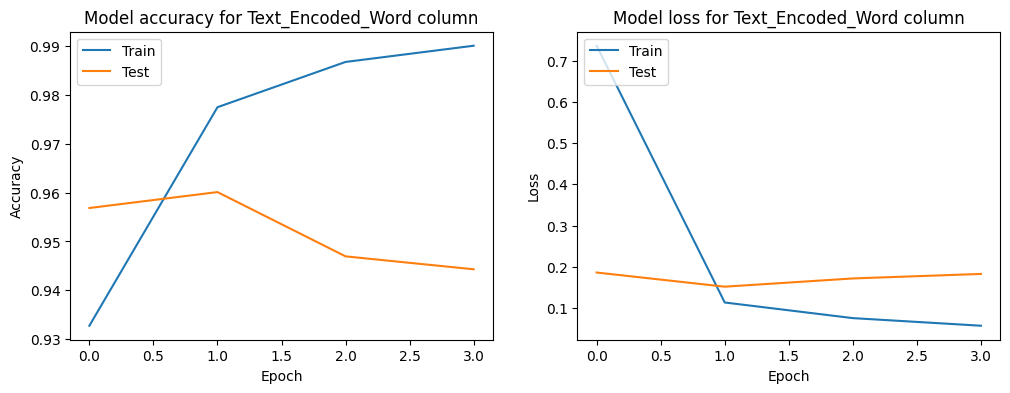

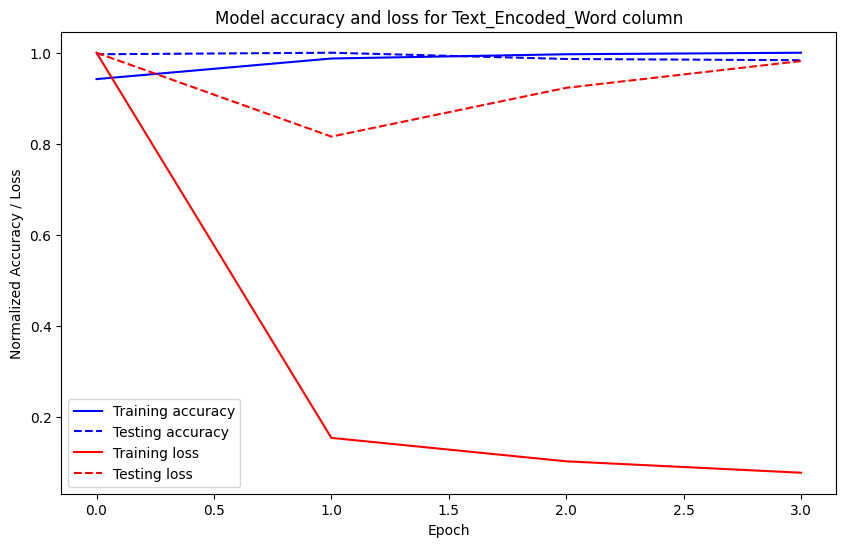

Training model on Text_Encoded_Character column
Epoch 1/10
2551/2551 [==============================] - 8999s 4s/step - loss: 1.0516 - accuracy: 0.8116 - val_loss: 0.6161 - val_accuracy: 0.8150
Epoch 2/10
2551/2551 [==============================] - 9210s 4s/step - loss: 0.5340 - accuracy: 0.8206 - val_loss: 1.0723 - val_accuracy: 0.4131
Epoch 3/10
2551/2551 [==============================] - 8318s 3s/step - loss: 0.5068 - accuracy: 0.8232 - val_loss: 0.5291 - val_accuracy: 0.8288
Epoch 4/10
2551/2551 [==============================] - 8448s 3s/step - loss: 0.4946 - accuracy: 0.8270 - val_loss: 0.5130 - val_accuracy: 0.8108
Epoch 5/10
2551/2551 [==============================] - 8547s 3s/step - loss: 0.4881 - accuracy: 0.8286 - val_loss: 0.6989 - val_accuracy: 0.6671
Epoch 6/10
2551/2551 [==============================] - 9440s 4s/step - loss: 0.4840 - accuracy: 0.8283 - val_loss: 0.6381 - val_accuracy: 0.6947
Epoch 7/10
2551/2551 [==============================] - 7794s 3s/step - loss

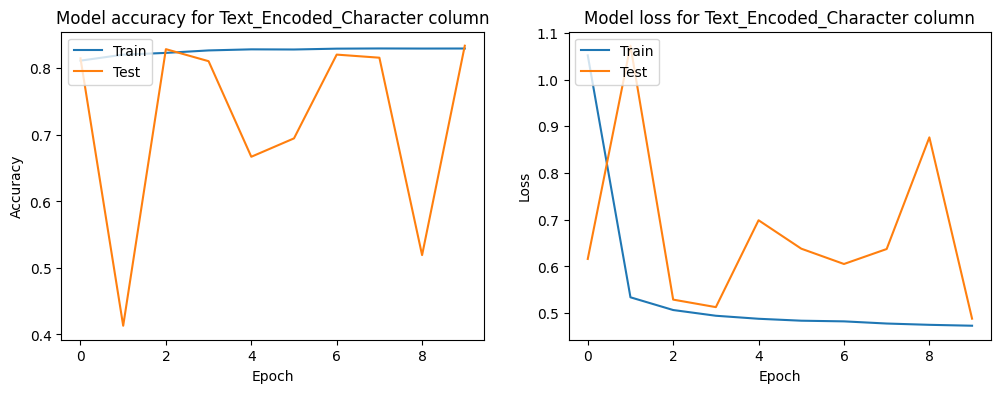

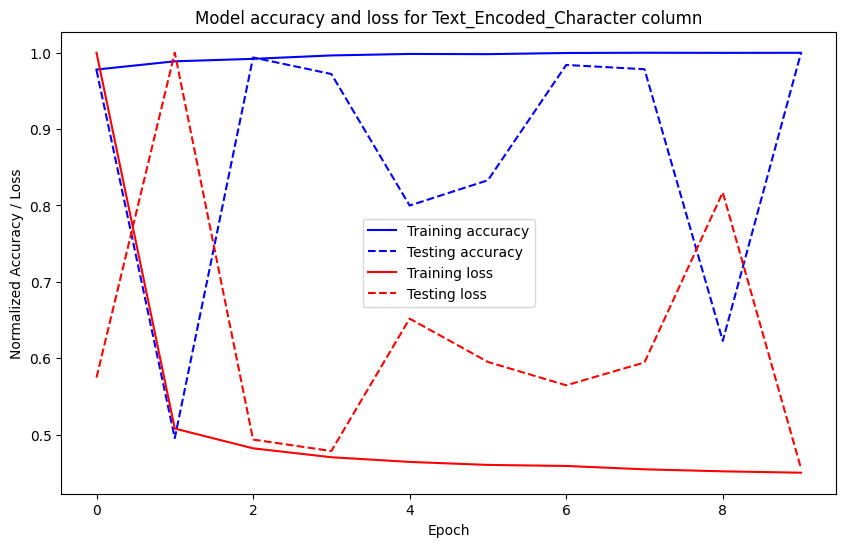

In [7]:




import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
import matplotlib.pyplot as plt

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'



# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')
# Find the maximum index value from both columns
#max_word_index = max(data['Text_Encoded_Word'].apply(max).max(), data['Text_Encoded_Character'].apply(max).max())
#print(max_word_index)

import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')

# Calculate the number of samples for the smaller dataset
sample_size = int(1* len(data))

# Split the dataset into a smaller dataset and a temporary dataset (which you won't use)+++++++++++++++++++++++++++
small_data, _, _, _ = train_test_split(data, data['Scam'], test_size=1-0.5, random_state=42, stratify=data['Scam'])

# Print the number of samples taken from each class
print(f"Number of scam samples: {small_data['Scam'].sum()}")
print(f"Number of non-scam samples: {len(small_data) - small_data['Scam'].sum()}")

# Print the total number of samples in the small_data DataFrame
print(f"Total number of samples in the smaller dataset: {len(small_data)}")


train_data, test_data = train_test_split(small_data, test_size=0.2, random_state=42, stratify=small_data['Scam'])

# Calculate the percentage of scam and non-scam samples in the train_data
train_scam_count = train_data['Scam'].sum()
train_total_count = len(train_data)
train_scam_percentage = (train_scam_count / train_total_count) * 100
train_non_scam_percentage = 100 - train_scam_percentage

print(f"Training data: Scam = {train_scam_percentage:.2f}%, Non-Scam = {train_non_scam_percentage:.2f}%")

# Calculate the percentage of scam and non-scam samples in the test_data
test_scam_count = test_data['Scam'].sum()
test_total_count = len(test_data)
test_scam_percentage = (test_scam_count / test_total_count) * 100
test_non_scam_percentage = 100 - test_scam_percentage

print(f"Testing data: Scam = {test_scam_percentage:.2f}%, Non-Scam = {test_non_scam_percentage:.2f}%")


# train_data, test_data are already defined when you split the balanced_data earlier


# Prepare the data
max_length = 100  # Set your desired max length for padding
max_words = 1700000  # Set the maximum number of words in the vocabulary


import ast

train_data['Text_Encoded_Word'] = train_data['Text_Encoded_Word'].apply(ast.literal_eval)
test_data['Text_Encoded_Word'] = test_data['Text_Encoded_Word'].apply(ast.literal_eval)

train_data['Text_Encoded_Character'] = train_data['Text_Encoded_Character'].apply(ast.literal_eval)
test_data['Text_Encoded_Character'] = test_data['Text_Encoded_Character'].apply(ast.literal_eval)


# Process 'Text_Encoded_Word' column,, 'Text_Encoded_Word' column, which contains tokenized text at the word level
X_train_word = pad_sequences(train_data['Text_Encoded_Word'].tolist(), maxlen=max_length)
X_test_word = pad_sequences(test_data['Text_Encoded_Word'].tolist(), maxlen=max_length)

# Process 'Text_Encoded_Character' column,,contains tokenized text at the character level,
X_train_char = pad_sequences(train_data['Text_Encoded_Character'].tolist(), maxlen=max_length)
X_test_char = pad_sequences(test_data['Text_Encoded_Character'].tolist(), maxlen=max_length)

# Process 'Scam' column
y_train = train_data['Scam'].values
y_test = test_data['Scam'].values


from keras.models import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, Dropout
from keras.regularizers import l2

from keras.layers import SpatialDropout1D, MaxPooling1D

def improved_model(embedding_matrix=None):
    model = Sequential()

    if embedding_matrix is None:
        model.add(Embedding(max_words, 200, input_length=max_length))
    else:
        model.add(Embedding(max_words, 200, input_length=max_length, weights=[embedding_matrix], trainable=False))

    model.add(SpatialDropout1D(0.2))  # Added SpatialDropout1D
    model.add(Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.02)))  # Reduced number of filters and increased regularization strength
    model.add(BatchNormalization())
    model.add(MaxPooling1D())  # Added MaxPooling1D
    model.add(Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.02)))  # Increased regularization strength
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, kernel_regularizer=l2(0.02)))  # Reduced number of units and increased regularization strength
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.6))  # Increased dropout rate
    model.add(Dense(1, activation='sigmoid'))

    return model


import numpy as np
from sklearn.metrics import confusion_matrix


input_data = [
    {
        "name": "Text_Encoded_Word",
        "X_train": X_train_word,
        "X_test": X_test_word,
        "epochs": 4  # Set the number of epochs for Text_Encoded_Word
    },
    {
        "name": "Text_Encoded_Character",
        "X_train": X_train_char,
        "X_test": X_test_char,
        "epochs": 10  # Set the number of epochs for Text_Encoded_Character
    }
]



for data in input_data:
    print(f"Training model on {data['name']} column")
    
    # Instantiate the model
    model = improved_model()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model with the corresponding number of epochs
    history = model.fit(data['X_train'], y_train, validation_data=(data['X_test'], y_test), epochs=data["epochs"], batch_size=64)


    # Evaluate the model
    loss, accuracy = model.evaluate(data['X_test'], y_test)
    print(f"Test accuracy on {data['name']} column: {accuracy}")


    
    # Calculate confusion matrix
    y_pred = np.round(model.predict(data['X_test']))
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix along with an explanation
    print(f"Confusion matrix on {data['name']} column:\n {cm}\n")
    print("Confusion Matrix Explanation:")
    print("True Negative (TN):", cm[0][0], "Non-scam tweets correctly classified as non-scam")
    print("False Positive (FP):", cm[0][1], "Non-scam tweets incorrectly classified as scam")
    print("False Negative (FN):", cm[1][0], "Scam tweets incorrectly classified as non-scam")
    print("True Positive (TP):", cm[1][1], "Scam tweets correctly classified as scam\n")


    # Create a single figure with two subplots: one for accuracy and one for loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot training & validation accuracy values on the first subplot
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model accuracy for {data["name"]} column')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values on the second subplot
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model loss for {data["name"]} column')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the figure
    plt.show()

    # Normalize accuracy and loss values
    train_acc_norm = [acc / max(history.history['accuracy']) for acc in history.history['accuracy']]
    test_acc_norm = [acc / max(history.history['val_accuracy']) for acc in history.history['val_accuracy']]
    train_loss_norm = [loss / max(history.history['loss']) for loss in history.history['loss']]
    test_loss_norm = [loss / max(history.history['val_loss']) for loss in history.history['val_loss']]

    # Create a single figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot training & validation accuracy values on the same plot
    ax.plot(train_acc_norm, 'b', label='Training accuracy')
    ax.plot(test_acc_norm, 'b--', label='Testing accuracy')

    # Plot training & validation loss values on the same plot
    ax.plot(train_loss_norm, 'r', label='Training loss')
    ax.plot(test_loss_norm, 'r--', label='Testing loss')

    # Set title, labels, and legend
    ax.set_title(f'Model accuracy and loss for {data["name"]} column')
    ax.set_ylabel('Normalized Accuracy / Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

    # Show the figure
    plt.show()


Number of scam samples: 100659
Number of non-scam samples: 100659
Total number of samples in the balanced dataset: 201318
Training data: Scam = 50.00%, Non-Scam = 50.00%
Testing data: Scam = 50.00%, Non-Scam = 50.00%
Training model on Text_Encoded_Word column
Epoch 1/4
2517/2517 [==============================] - 8638s 3s/step - loss: 0.1500 - accuracy: 0.9393 - val_loss: 0.0863 - val_accuracy: 0.9659
Epoch 2/4
2517/2517 [==============================] - 8537s 3s/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.1193 - val_accuracy: 0.9640
Epoch 3/4
2517/2517 [==============================] - 8537s 3s/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.1352 - val_accuracy: 0.9633
Epoch 4/4
1259/1259 [==============================] - 43s 34ms/step - loss: 0.1556 - accuracy: 0.9630
Test accuracy on Text_Encoded_Word column: 0.9629694223403931
1259/1259 [==============================] - 45s 34ms/step
Confusion matrix on Text_Encoded_Word column:
 [[19469   663]
 [  828 19304]]

Co

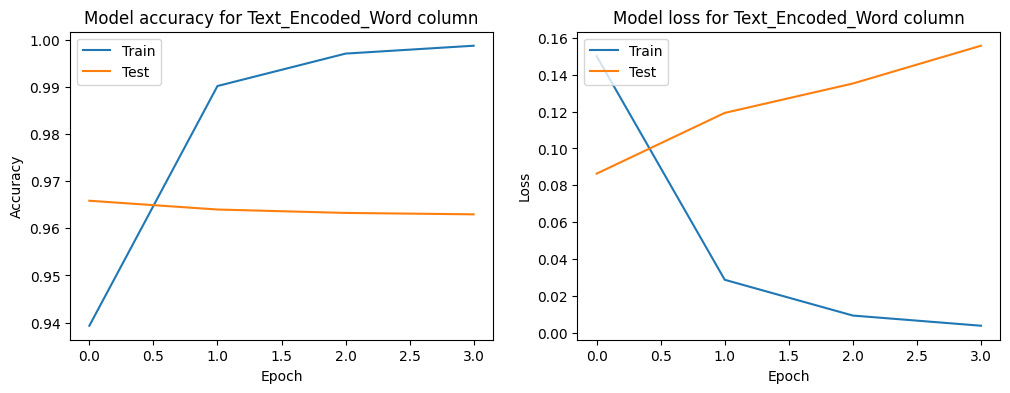

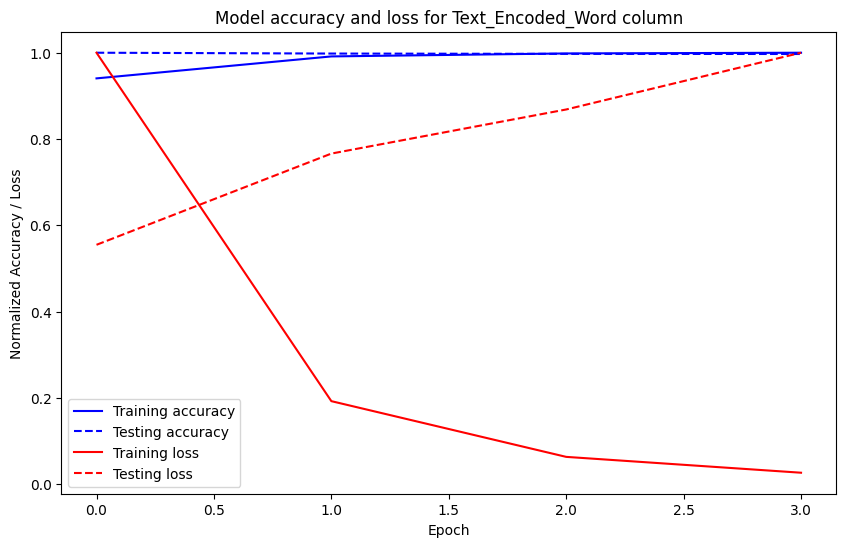

Training model on Text_Encoded_Character column
Epoch 1/10
2517/2517 [==============================] - 8482s 3s/step - loss: 0.6048 - accuracy: 0.6307 - val_loss: 0.5724 - val_accuracy: 0.6690
Epoch 2/10
2517/2517 [==============================] - 8932s 4s/step - loss: 0.5563 - accuracy: 0.6818 - val_loss: 0.5210 - val_accuracy: 0.7124
Epoch 3/10
2517/2517 [==============================] - 11402s 5s/step - loss: 0.5007 - accuracy: 0.7230 - val_loss: 0.4839 - val_accuracy: 0.7412
Epoch 4/10
2517/2517 [==============================] - 8236s 3s/step - loss: 0.4519 - accuracy: 0.7577 - val_loss: 0.4280 - val_accuracy: 0.7767
Epoch 5/10
2517/2517 [==============================] - 8297s 3s/step - loss: 0.4104 - accuracy: 0.7866 - val_loss: 0.3918 - val_accuracy: 0.7975
Epoch 6/10
2517/2517 [==============================] - 8482s 3s/step - loss: 0.3735 - accuracy: 0.8098 - val_loss: 0.3694 - val_accuracy: 0.8157
Epoch 7/10
2517/2517 [==============================] - 8245s 3s/step - los

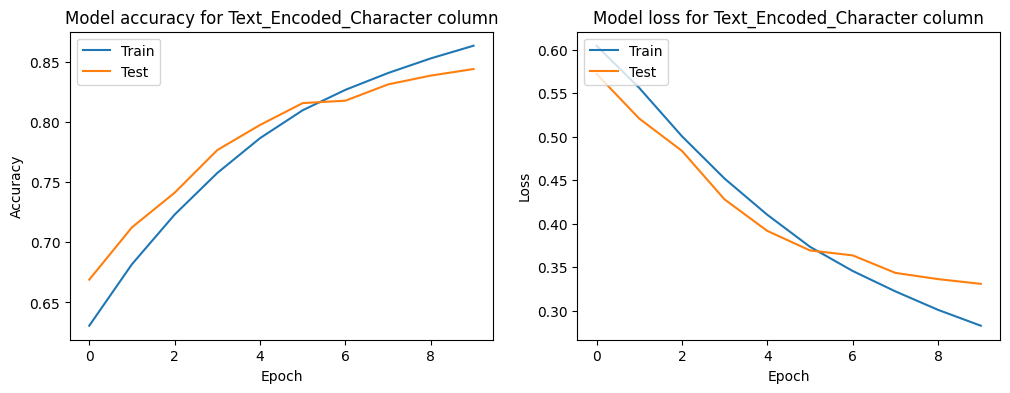

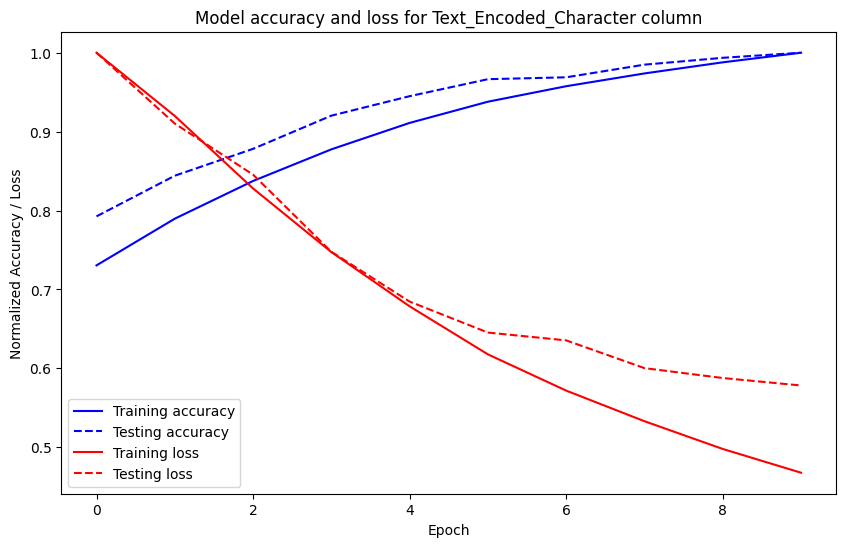

In [1]:



import tensorflow as tf
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)
import numpy as np
import random
import tensorflow as tf

# Set the seed for random number generation
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)



###balanced input 50%-50% and improved model ++++


import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'



# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')
# Find the maximum index value from both columns
#max_word_index = max(data['Text_Encoded_Word'].apply(max).max(), data['Text_Encoded_Character'].apply(max).max())
#print(max_word_index)

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')

# Split the dataset into scam and non-scam dataframes
scam_data = data[data['Scam'] == 1]
non_scam_data = data[data['Scam'] == 0]

# Find the minimum number of samples between scam and non-scam dataframes
min_samples = min(len(scam_data), len(non_scam_data))

# Calculate the number of samples for each class to make 10% of the main dataset
sample_size = int(1* len(data) / 2)

# Cap the sample size to the minimum number of samples if it exceeds the available samples in either class
sample_size = min(sample_size, min_samples)

# Randomly sample the specified number of rows from each dataframe
sampled_scam_data = scam_data.sample(sample_size, random_state=42)
sampled_non_scam_data = non_scam_data.sample(sample_size, random_state=42)

# Concatenate the two sampled dataframes to create a balanced dataset
balanced_data = pd.concat([sampled_scam_data, sampled_non_scam_data], axis=0)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset

# Print the number of samples taken from each class
print(f"Number of scam samples: {len(sampled_scam_data)}")
print(f"Number of non-scam samples: {len(sampled_non_scam_data)}")

# Print the total number of samples in the balanced_data DataFrame
print(f"Total number of samples in the balanced dataset: {len(balanced_data)}")


# Split the balanced dataset into training and testing sets, maintaining the 50-50 balance
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['Scam'])

# Calculate the percentage of scam and non-scam samples in the train_data
train_scam_count = train_data['Scam'].sum()
train_total_count = len(train_data)
train_scam_percentage = (train_scam_count / train_total_count) * 100
train_non_scam_percentage = 100 - train_scam_percentage

print(f"Training data: Scam = {train_scam_percentage:.2f}%, Non-Scam = {train_non_scam_percentage:.2f}%")

# Calculate the percentage of scam and non-scam samples in the test_data
test_scam_count = test_data['Scam'].sum()
test_total_count = len(test_data)
test_scam_percentage = (test_scam_count / test_total_count) * 100
test_non_scam_percentage = 100 - test_scam_percentage

print(f"Testing data: Scam = {test_scam_percentage:.2f}%, Non-Scam = {test_non_scam_percentage:.2f}%")

# train_data, test_data are already defined when you split the balanced_data earlier

# Prepare the data
max_length = 100  # Set your desired max length for padding
max_words = 1700000  # Set the maximum number of words in the vocabulary


import ast

train_data['Text_Encoded_Word'] = train_data['Text_Encoded_Word'].apply(ast.literal_eval)
test_data['Text_Encoded_Word'] = test_data['Text_Encoded_Word'].apply(ast.literal_eval)

train_data['Text_Encoded_Character'] = train_data['Text_Encoded_Character'].apply(ast.literal_eval)
test_data['Text_Encoded_Character'] = test_data['Text_Encoded_Character'].apply(ast.literal_eval)


# Process 'Text_Encoded_Word' column,, 'Text_Encoded_Word' column, which contains tokenized text at the word level
X_train_word = pad_sequences(train_data['Text_Encoded_Word'].tolist(), maxlen=max_length)
X_test_word = pad_sequences(test_data['Text_Encoded_Word'].tolist(), maxlen=max_length)

# Process 'Text_Encoded_Character' column,,contains tokenized text at the character level,
X_train_char = pad_sequences(train_data['Text_Encoded_Character'].tolist(), maxlen=max_length)
X_test_char = pad_sequences(test_data['Text_Encoded_Character'].tolist(), maxlen=max_length)

# Process 'Scam' column
y_train = train_data['Scam'].values
y_test = test_data['Scam'].values

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, Dropout
from keras.regularizers import l2

from keras.layers import SpatialDropout1D, MaxPooling1D

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Activation, Dropout

from keras.layers import LSTM, GRU

from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, GRU, Dense

def bidirectional_lstm_gru_model(embedding_matrix=None):
    model = Sequential()

    if embedding_matrix is None:
        model.add(Embedding(max_words, 200, input_length=max_length))
    else:
        model.add(Embedding(max_words, 200, input_length=max_length, weights=[embedding_matrix], trainable=False))

    model.add(SpatialDropout1D(0.2))

    # Add bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64, return_sequences=True)))

    # Add bidirectional GRU layer
    model.add(Bidirectional(GRU(64, return_sequences=False)))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation='sigmoid'))

    return model

# Instantiate the model
model = bidirectional_lstm_gru_model()

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
#history = model.fit(input_data[model_type]['input'], y_train, validation_data=(input_data[model_type]['input'], y_test), epochs=input_data[model_type]['epochs'], batch_size=64)


import numpy as np
from sklearn.metrics import confusion_matrix

# Define a list containing dictionaries for word-level and character-level input data
input_data = [
    {
        "name": "Text_Encoded_Word",
        "X_train": X_train_word,
        "X_test": X_test_word,
        "epochs": 4  # Set the number of epochs for Text_Encoded_Word
    },
    {
        "name": "Text_Encoded_Character",
        "X_train": X_train_char,
        "X_test": X_test_char,
        "epochs": 10  # Set the number of epochs for Text_Encoded_Character
    }
]

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

for data in input_data:
    print(f"Training model on {data['name']} column")
    # Assign X_train and X_test from the current input_data dictionary
    X_train = data["X_train"]
    X_test = data["X_test"]

    # Instantiate the model
    model = bidirectional_lstm_gru_model()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model with the corresponding number of epochs
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=data["epochs"], batch_size=64)

    # Print the model summary
    model.summary()

    # Evaluate the model
    loss, accuracy = model.evaluate(data['X_test'], y_test)
    print(f"Test accuracy on {data['name']} column: {accuracy}")

    # Calculate confusion matrix
    y_pred = np.round(model.predict(data['X_test']))
    cm = confusion_matrix(y_test, y_pred)
    # Print the confusion matrix along with an explanation
    print(f"Confusion matrix on {data['name']} column:\n {cm}\n")
    print("Confusion Matrix Explanation:")
    print("True Negative (TN):", cm[0][0], "Non-scam tweets correctly classified as non-scam")
    print("False Positive (FP):", cm[0][1], "Non-scam tweets incorrectly classified as scam")
    print("False Negative (FN):", cm[1][0], "Scam tweets incorrectly classified as non-scam")
    print("True Positive (TP):", cm[1][1], "Scam tweets correctly classified as scam\n")

    # Create a single figure with two subplots: one for accuracy and one for loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values on the first subplot
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model accuracy for {data["name"]} column')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values on the second subplot
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model loss for {data["name"]} column')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the figure
    plt.show()

    # Normalize accuracy and loss values
    train_acc_norm = [acc / max(history.history['accuracy']) for acc in history.history['accuracy']]
    test_acc_norm = [acc / max(history.history['val_accuracy']) for acc in history.history['val_accuracy']]
    train_loss_norm = [loss / max(history.history['loss']) for loss in history.history['loss']]
    test_loss_norm = [loss / max(history.history['val_loss']) for loss in history.history['val_loss']]

    # Create a single figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot training & validation accuracy values on the same plot
    ax.plot(train_acc_norm, 'b', label='Training accuracy')
    ax.plot(test_acc_norm, 'b--', label='Testing accuracy')

    # Plot training & validation loss values on the same plot
    ax.plot(train_loss_norm, 'r', label='Training loss')
    ax.plot(test_loss_norm, 'r--', label='Testing loss')

    # Set title, labels, and legend
    ax.set_title(f'Model accuracy and loss for {data["name"]} column')
    ax.set_ylabel('Normalized Accuracy / Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

    # Show the figure
    plt.show()


Number of scam samples: 100659
Number of non-scam samples: 100659
Total number of samples in the balanced dataset: 201318
Training data: Scam = 50.00%, Non-Scam = 50.00%
Testing data: Scam = 50.00%, Non-Scam = 50.00%
Training model on Text_Encoded_Word column
Epoch 1/3
2517/2517 [==============================] - 8484s 3s/step - loss: 0.1391 - accuracy: 0.9424 - val_loss: 0.0789 - val_accuracy: 0.9687
Epoch 2/3
2517/2517 [==============================] - 8301s 3s/step - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.1190 - val_accuracy: 0.9648
Epoch 3/3
1259/1259 [==============================] - 44s 35ms/step - loss: 0.1351 - accuracy: 0.9642
Test accuracy on Text_Encoded_Word column: 0.9641615152359009
1259/1259 [==============================] - 45s 35ms/step
Confusion matrix on Text_Encoded_Word column:
 [[19252   880]
 [  563 19569]]

Confusion Matrix Explanation:
True Negative (TN): 19252 Non-scam tweets correctly classified as non-scam
False Positive (FP): 880 Non-scam tweets i

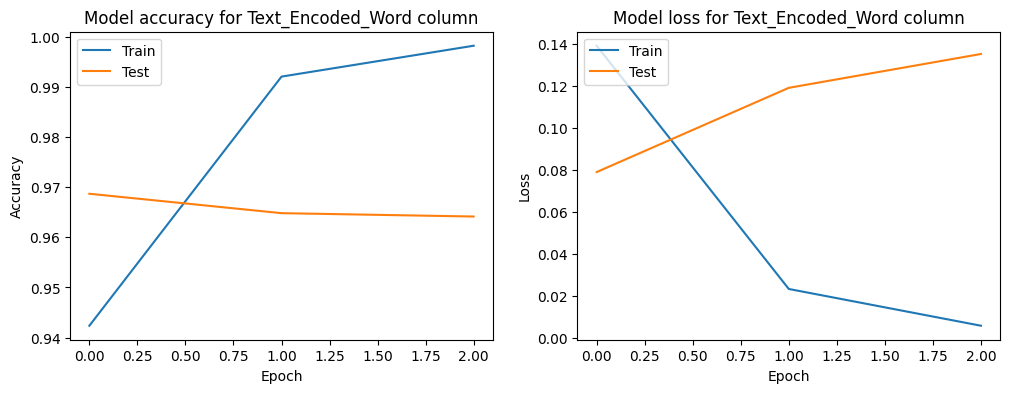

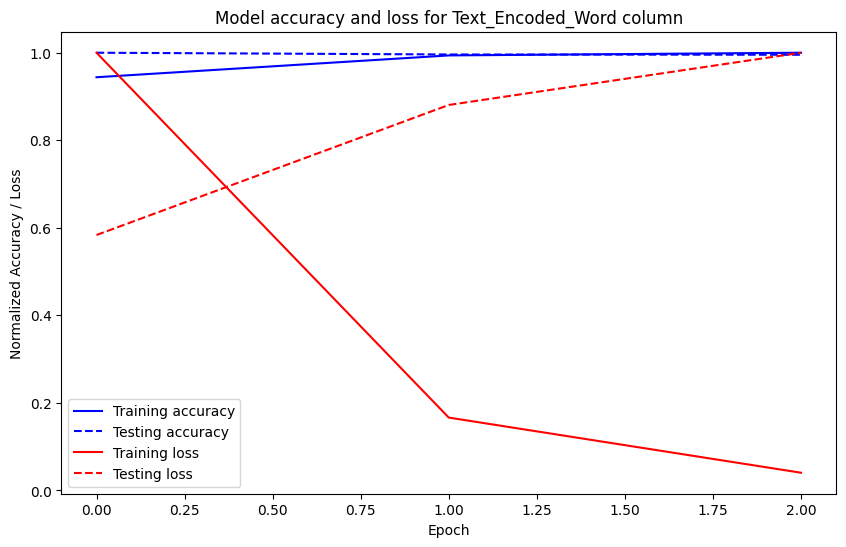

Training model on Text_Encoded_Character column
Epoch 1/10
2517/2517 [==============================] - 11983s 5s/step - loss: 0.5702 - accuracy: 0.6679 - val_loss: 0.5238 - val_accuracy: 0.7072
Epoch 2/10
2517/2517 [==============================] - 9390s 4s/step - loss: 0.5028 - accuracy: 0.7211 - val_loss: 0.4663 - val_accuracy: 0.7514
Epoch 3/10
2517/2517 [==============================] - 9163s 4s/step - loss: 0.4377 - accuracy: 0.7693 - val_loss: 0.4134 - val_accuracy: 0.7880
Epoch 4/10
2517/2517 [==============================] - 12162s 5s/step - loss: 0.3840 - accuracy: 0.8038 - val_loss: 0.3618 - val_accuracy: 0.8161
Epoch 5/10
2517/2517 [==============================] - 8707s 3s/step - loss: 0.3461 - accuracy: 0.8266 - val_loss: 0.3412 - val_accuracy: 0.8282
Epoch 6/10
2517/2517 [==============================] - 8955s 4s/step - loss: 0.3182 - accuracy: 0.8442 - val_loss: 0.3325 - val_accuracy: 0.8379
Epoch 7/10
2517/2517 [==============================] - 8862s 4s/step - lo

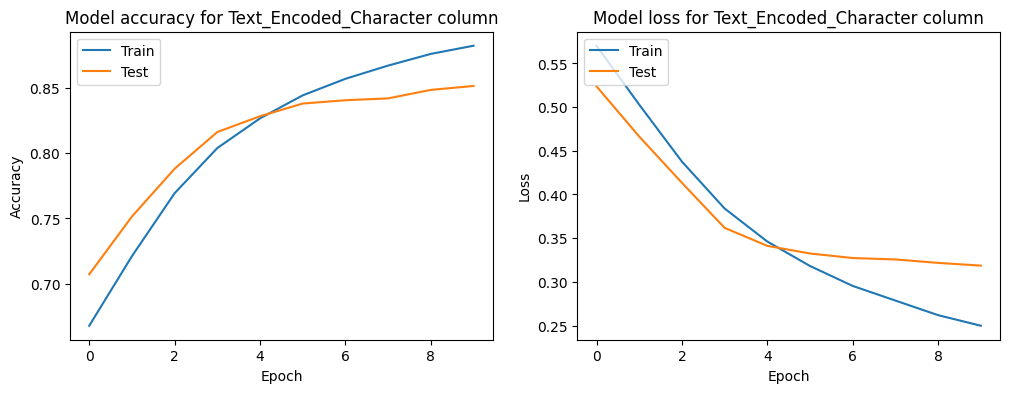

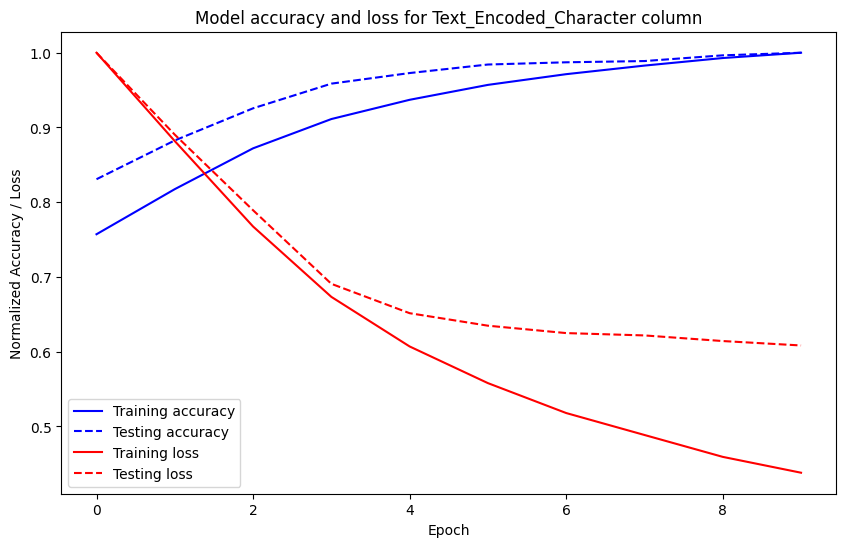

In [1]:

##   my4  Attention(Layer)...bidirectional_lstm_gru_model


import tensorflow as tf
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)
import numpy as np
import random
import tensorflow as tf

# Set the seed for random number generation
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


###balanced input 50%-50% and improved model ++++


import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam

import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'



# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')
# Find the maximum index value from both columns
#max_word_index = max(data['Text_Encoded_Word'].apply(max).max(), data['Text_Encoded_Character'].apply(max).max())
#print(max_word_index)

import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('Cleaned_Data  output 1gb.csv')

# Split the dataset into scam and non-scam dataframes
scam_data = data[data['Scam'] == 1]
non_scam_data = data[data['Scam'] == 0]

# Find the minimum number of samples between scam and non-scam dataframes
min_samples = min(len(scam_data), len(non_scam_data))

# Calculate the number of samples for each class to make 10% of the main dataset
sample_size = int(1 * len(data) / 2)

# Cap the sample size to the minimum number of samples if it exceeds the available samples in either class
sample_size = min(sample_size, min_samples)

# Randomly sample the specified number of rows from each dataframe
sampled_scam_data = scam_data.sample(sample_size, random_state=42)
sampled_non_scam_data = non_scam_data.sample(sample_size, random_state=42)

# Concatenate the two sampled dataframes to create a balanced dataset
balanced_data = pd.concat([sampled_scam_data, sampled_non_scam_data], axis=0)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset

# Print the number of samples taken from each class
print(f"Number of scam samples: {len(sampled_scam_data)}")
print(f"Number of non-scam samples: {len(sampled_non_scam_data)}")

# Print the total number of samples in the balanced_data DataFrame
print(f"Total number of samples in the balanced dataset: {len(balanced_data)}")


# Split the balanced dataset into training and testing sets, maintaining the 50-50 balance
train_data, test_data = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['Scam'])

# Calculate the percentage of scam and non-scam samples in the train_data
train_scam_count = train_data['Scam'].sum()
train_total_count = len(train_data)
train_scam_percentage = (train_scam_count / train_total_count) * 100
train_non_scam_percentage = 100 - train_scam_percentage

print(f"Training data: Scam = {train_scam_percentage:.2f}%, Non-Scam = {train_non_scam_percentage:.2f}%")

# Calculate the percentage of scam and non-scam samples in the test_data
test_scam_count = test_data['Scam'].sum()
test_total_count = len(test_data)
test_scam_percentage = (test_scam_count / test_total_count) * 100
test_non_scam_percentage = 100 - test_scam_percentage

print(f"Testing data: Scam = {test_scam_percentage:.2f}%, Non-Scam = {test_non_scam_percentage:.2f}%")

# train_data, test_data are already defined when you split the balanced_data earlier

# Prepare the data
max_length = 100  # Set your desired max length for padding
max_words = 1700000  # Set the maximum number of words in the vocabulary


import ast

train_data['Text_Encoded_Word'] = train_data['Text_Encoded_Word'].apply(ast.literal_eval)
test_data['Text_Encoded_Word'] = test_data['Text_Encoded_Word'].apply(ast.literal_eval)

train_data['Text_Encoded_Character'] = train_data['Text_Encoded_Character'].apply(ast.literal_eval)
test_data['Text_Encoded_Character'] = test_data['Text_Encoded_Character'].apply(ast.literal_eval)


# Process 'Text_Encoded_Word' column,, 'Text_Encoded_Word' column, which contains tokenized text at the word level
X_train_word = pad_sequences(train_data['Text_Encoded_Word'].tolist(), maxlen=max_length)
X_test_word = pad_sequences(test_data['Text_Encoded_Word'].tolist(), maxlen=max_length)

# Process 'Text_Encoded_Character' column,,contains tokenized text at the character level,
X_train_char = pad_sequences(train_data['Text_Encoded_Character'].tolist(), maxlen=max_length)
X_test_char = pad_sequences(test_data['Text_Encoded_Character'].tolist(), maxlen=max_length)

# Process 'Scam' column
y_train = train_data['Scam'].values
y_test = test_data['Scam'].values

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, BatchNormalization, GlobalMaxPooling1D, Dense, Activation, Dropout
from keras.regularizers import l2

from keras.layers import SpatialDropout1D, MaxPooling1D

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Activation, Dropout

from keras.layers import LSTM, GRU

from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, GRU, Dense


from keras.layers import Layer
import keras.backend as K

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight",
                                 shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="attention_bias",
                                 shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        et = K.squeeze(K.tanh(K.dot(x, self.W) + self.b), axis=-1)
        at = K.softmax(et)
        at = K.expand_dims(at, axis=-1)
        output = x * at
        return K.sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(Attention, self).get_config()



def bidirectional_lstm_gru_model(embedding_matrix=None):
    model = Sequential()

    if embedding_matrix is None:
        model.add(Embedding(max_words, 200, input_length=max_length))
    else:
        model.add(Embedding(max_words, 200, input_length=max_length, weights=[embedding_matrix], trainable=False))

    model.add(SpatialDropout1D(0.2))

    # Add bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64, return_sequences=True)))

    # Add bidirectional GRU layer
    model.add(Bidirectional(GRU(64, return_sequences=True)))

    # Add attention layer
    model.add(Attention())

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation='sigmoid'))

    return model



# Instantiate the model
model = bidirectional_lstm_gru_model()

# Compile the model
#model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
#history = model.fit(input_data[model_type]['input'], y_train, validation_data=(input_data[model_type]['input'], y_test), epochs=input_data[model_type]['epochs'], batch_size=64)


import numpy as np
from sklearn.metrics import confusion_matrix

# Define a list containing dictionaries for word-level and character-level input data
input_data = [
    {
        "name": "Text_Encoded_Word",
        "X_train": X_train_word,
        "X_test": X_test_word,
        "epochs": 3  # Set the number of epochs for Text_Encoded_Word
    },
    {
        "name": "Text_Encoded_Character",
        "X_train": X_train_char,
        "X_test": X_test_char,
        "epochs": 10  # Set the number of epochs for Text_Encoded_Character
    }
]

import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

for data in input_data:
    print(f"Training model on {data['name']} column")
    # Assign X_train and X_test from the current input_data dictionary
    X_train = data["X_train"]
    X_test = data["X_test"]

    # Instantiate the model
    model = bidirectional_lstm_gru_model()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model with the corresponding number of epochs
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=data["epochs"], batch_size=64)



    # Evaluate the model
    loss, accuracy = model.evaluate(data['X_test'], y_test)
    print(f"Test accuracy on {data['name']} column: {accuracy}")

    # Calculate confusion matrix
    y_pred = np.round(model.predict(data['X_test']))
    cm = confusion_matrix(y_test, y_pred)
    # Print the confusion matrix along with an explanation
    print(f"Confusion matrix on {data['name']} column:\n {cm}\n")
    print("Confusion Matrix Explanation:")
    print("True Negative (TN):", cm[0][0], "Non-scam tweets correctly classified as non-scam")
    print("False Positive (FP):", cm[0][1], "Non-scam tweets incorrectly classified as scam")
    print("False Negative (FN):", cm[1][0], "Scam tweets incorrectly classified as non-scam")
    print("True Positive (TP):", cm[1][1], "Scam tweets correctly classified as scam\n")

    # Create a single figure with two subplots: one for accuracy and one for loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    import matplotlib.pyplot as plt

    # Plot training & validation accuracy values on the first subplot
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title(f'Model accuracy for {data["name"]} column')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values on the second subplot
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'Model loss for {data["name"]} column')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the figure
    plt.show()

    # Normalize accuracy and loss values
    train_acc_norm = [acc / max(history.history['accuracy']) for acc in history.history['accuracy']]
    test_acc_norm = [acc / max(history.history['val_accuracy']) for acc in history.history['val_accuracy']]
    train_loss_norm = [loss / max(history.history['loss']) for loss in history.history['loss']]
    test_loss_norm = [loss / max(history.history['val_loss']) for loss in history.history['val_loss']]

    # Create a single figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot training & validation accuracy values on the same plot
    ax.plot(train_acc_norm, 'b', label='Training accuracy')
    ax.plot(test_acc_norm, 'b--', label='Testing accuracy')

    # Plot training & validation loss values on the same plot
    ax.plot(train_loss_norm, 'r', label='Training loss')
    ax.plot(test_loss_norm, 'r--', label='Testing loss')

    # Set title, labels, and legend
    ax.set_title(f'Model accuracy and loss for {data["name"]} column')
    ax.set_ylabel('Normalized Accuracy / Loss')
    ax.set_xlabel('Epoch')
    ax.legend()

    # Show the figure
    plt.show()


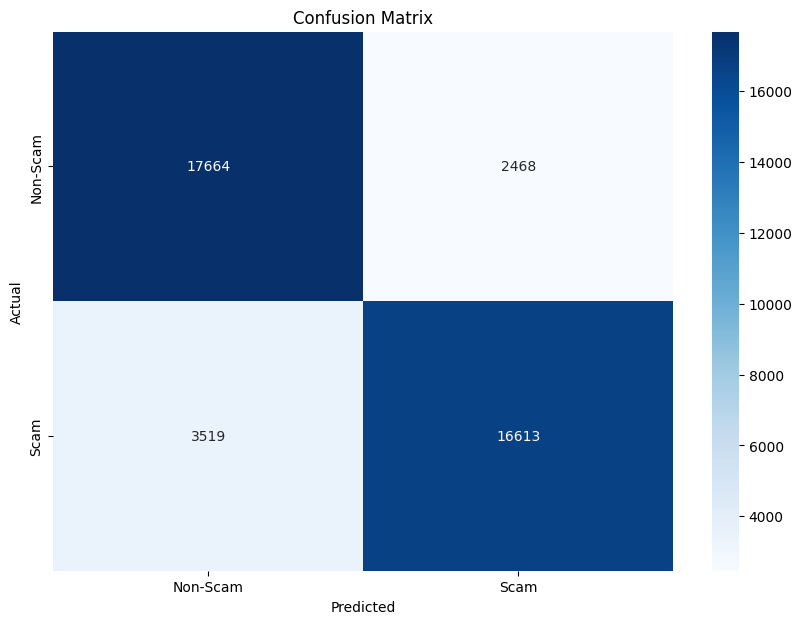

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the confusion matrix
confusion_matrix = [[17664, 2468], 
                    [3519, 16613]]

# Define the labels
class_names = ['Non-Scam', 'Scam']

# Create a confusion matrix using Seaborn's heatmap() function
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add a title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()




import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Model and accuracy information
model_name = "CNN on Text_Encoded_Word column"  # Replace with your actual model name
accuracy = 0.9629694223403931  # Update with your actual accuracy

# Confusion matrix data
confusion_matrix = np.array([[19469, 663],
                             [828, 19304]])

# Create labels
labels = ['Non-Scam', 'Scam']

# Create confusion matrix heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {model_name}\nAccuracy: {accuracy:.4f}')
plt.show()

# Bar plot data
training_data = [153718, 50329]  # Replace with your actual training data
testing_data = [19469+828, 19304+663]  # Replace with your actual testing data

# Create bar plot using matplotlib and Seaborn
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, training_data, width, label='Training data')
plt.bar(x + width/2, testing_data, width, label='Testing data')

# Add labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of Samples')
plt.title('Distribution of Scam and Non-Scam Samples')
plt.xticks(x, labels)
plt.legend()

plt.show()

